In [9]:
import json
import matplotlib.pyplot as plt
import numpy as np

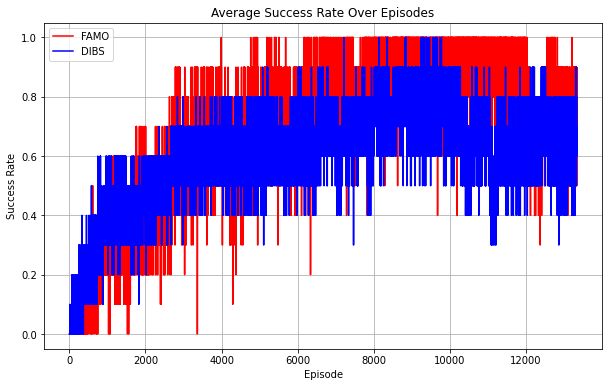

In [13]:
#Training Runs
# Path to your eval.log file
file_path_dibs = ['logs/metaworld-mt10_dibs_state_sac_radius0.03_seed_1234/train.log']
log_data_dibs = []
for file_path in file_path_dibs:
    with open(file_path, 'r') as f:
        log_data_dibs.extend(f.readlines())

episodes_dibs = []
success_rates_dibs = {}
average_success_rate = {}

for log in log_data_dibs:
    log = json.loads(log)
    if log['episode'] not in success_rates_dibs:
        success_rates_dibs[log['episode']] = []
    success_rates_dibs[log['episode']].append(np.mean([log['success_env_index_0'], log['success_env_index_1'], log['success_env_index_2'], log['success_env_index_3'], log['success_env_index_4'], log['success_env_index_5'], log['success_env_index_6'], log['success_env_index_7'], log['success_env_index_8'], log['success_env_index_9']]))
    average_success_rate[log['episode']] = np.mean(success_rates_dibs[log['episode']])

file_path = 'logs/metaworld-mt10_famo_gamma0.01_wlr0.025_seed_1234/train.log'

# Read the log file
with open(file_path, 'r') as f:
    log_data_famo = f.readlines()

episodes_famo = []
success_rates_famo = []

for log in log_data_famo:
    log = json.loads(log)
    episodes_famo.append(log['episode'])
    success_rates_famo.append(log['success'])

# Plot the success rate over episodes
plt.figure(figsize=(10, 6))
plt.plot(episodes_famo, success_rates_famo, linestyle='-', color='r', label='FAMO')
plt.plot(average_success_rate.keys(), average_success_rate.values(), linestyle='-', color='b', label='DIBS')
plt.title('Average Success Rate Over Episodes')
plt.xlabel('Episode')
plt.ylabel('Success Rate')
plt.legend()
plt.grid(True)
plt.show()


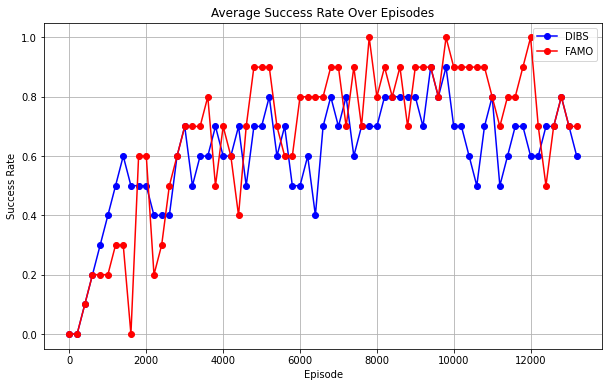

In [ ]:
# Path to your eval.log file
file_path_dibs = 'logs/metaworld-mt10_dibs_state_sac_radius0.03_seed_1234/eval.log'

# Read the log file
with open(file_path_dibs, 'r') as f:
    log_data_dibs = f.readlines()

episodes_dibs = []
success_rates_dibs = []

for log in log_data_dibs:
    log = json.loads(log)
    episodes_dibs.append(log['episode'])
    success_rates_dibs.append(log['success'])

file_path = 'logs/metaworld-mt10_famo_gamma0.01_wlr0.025_seed_1234/eval.log'

# Read the log file
with open(file_path, 'r') as f:
    log_data_famo = f.readlines()

episodes_famo = []
success_rates_famo = []

for log in log_data_famo:
    log = json.loads(log)
    episodes_famo.append(log['episode'])
    success_rates_famo.append(log['success'])

# Plot the success rate over episodes
plt.figure(figsize=(10, 6))
plt.plot(episodes_dibs, success_rates_dibs, marker='o', linestyle='-', color='b', label='DIBS')
plt#Training Runs
# Path to your eval.log file
file_path_dibs = ['logs/metaworld-mt10_dibs_state_sac_radius0.025_seed_1234/train.log']
log_data_dibs = []
for file_path in file_path_dibs:
    with open(file_path, 'r') as f:
        log_data_dibs.extend(f.readlines())

episodes_dibs = []
success_rates_dibs = {}
average_success_rate = {}

for log in log_data_dibs:
    log = json.loads(log)
    if log['episode'] not in success_rates_dibs:
        success_rates_dibs[log['episode']] = []
    success_rates_dibs[log['episode']].append(np.mean([log['success_env_index_0'], log['success_env_index_1'], log['success_env_index_2'], log['success_env_index_3'], log['success_env_index_4'], log['success_env_index_5'], log['success_env_index_6'], log['success_env_index_7'], log['success_env_index_8'], log['success_env_index_9']]))
    average_success_rate[log['episode']] = np.mean(success_rates_dibs[log['episode']])

file_path = 'logs/metaworld-mt10_famo_gamma0.01_wlr0.025_seed_1234/train.log'

# Read the log file
with open(file_path, 'r') as f:
    log_data_famo = f.readlines()

episodes_famo = []
success_rates_famo = []

for log in log_data_famo:
    log = json.loads(log)
    episodes_famo.append(log['episode'])
    success_rates_famo.append(log['success'])

# Plot the success rate over episodes
plt.figure(figsize=(10, 6))
plt.plot(average_success_rate.keys(), average_success_rate.values(), linestyle='-', color='b', label='DIBS')
plt.plot(episodes_famo, success_rates_famo, linestyle='-', color='r', label='FAMO')
plt.title('Average Success Rate Over Episodes')
plt.xlabel('Episode')
plt.ylabel('Success Rate')
plt.legend()
plt.grid(True)
plt.show()
.plot(episodes_famo, success_rates_famo, marker='o', linestyle='-', color='r', label='FAMO')
plt.title('Average Success Rate Over Episodes')
plt.xlabel('Episode')
plt.ylabel('Success Rate')
plt.legend()
plt.grid(True)
plt.show()

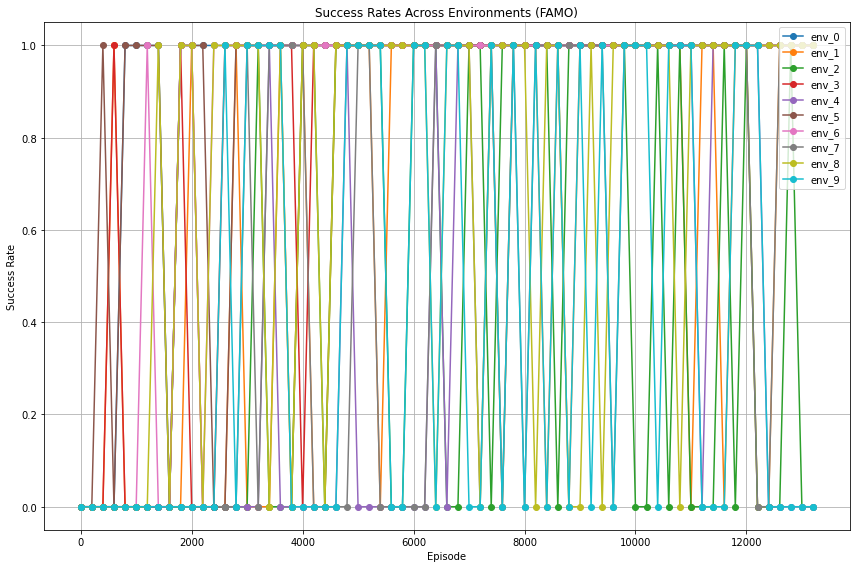

In [4]:
import json
import matplotlib.pyplot as plt

# Path to your eval.log file
file_path = 'logs/metaworld-mt10_famo_gamma0.01_wlr0.025_seed_1234/eval.log'

# Read the log file
with open(file_path, 'r') as f:
    log_data = f.readlines()

# Parse the JSON data into a list of dictionaries
logs = [json.loads(entry.strip()) for entry in log_data]

# Initialize lists to store episodes and success rates for each environment
episodes = []
env_success_rates = {f'env_{i}': [] for i in range(10)}  # 10 environments, from 0 to 9

# Extract data from logs
for log in logs:
    episodes.append(log['episode'])
    for i in range(10):  # There are 10 environments (env_index_0 to env_index_9)
        env_key = f'success_env_index_{i}'
        env_success_rates[f'env_{i}'].append(log[env_key])

# Plot the success rate for each environment
plt.figure(figsize=(12, 8))

# Plot each environment's success rate
for env, success_rates in env_success_rates.items():
    plt.plot(episodes, success_rates, marker='o', label=env)

plt.title('Success Rates Across Environments (FAMO)')
plt.xlabel('Episode')
plt.ylabel('Success Rate')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


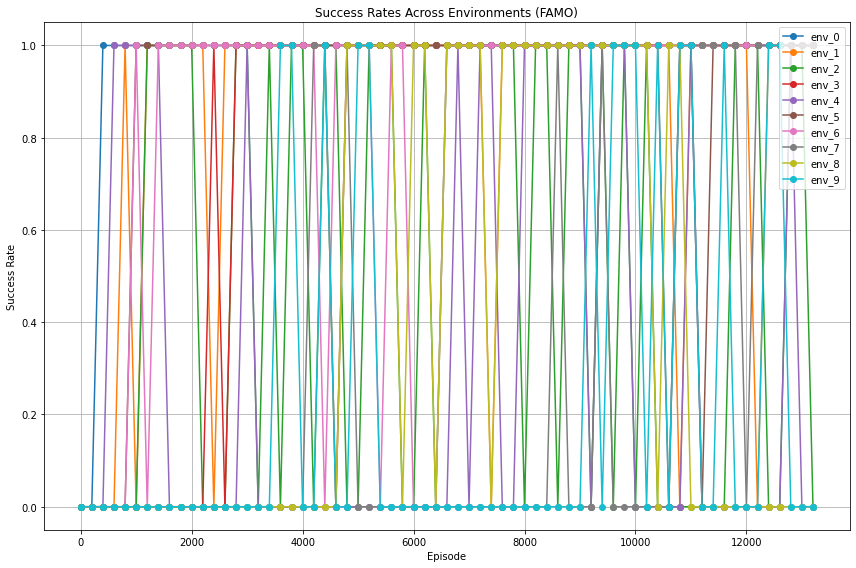

In [5]:
import json
import matplotlib.pyplot as plt

# Path to your eval.log file
file_path = 'logs/metaworld-mt10_dibs_state_sac_radius0.03_seed_1234/eval.log'

# Read the log file
with open(file_path, 'r') as f:
    log_data = f.readlines()

# Parse the JSON data into a list of dictionaries
logs = [json.loads(entry.strip()) for entry in log_data]

# Initialize lists to store episodes and success rates for each environment
episodes = []
env_success_rates = {f'env_{i}': [] for i in range(10)}  # 10 environments, from 0 to 9

# Extract data from logs
for log in logs:
    episodes.append(log['episode'])
    for i in range(10):  # There are 10 environments (env_index_0 to env_index_9)
        env_key = f'success_env_index_{i}'
        env_success_rates[f'env_{i}'].append(log[env_key])

# Plot the success rate for each environment
plt.figure(figsize=(12, 8))

# Plot each environment's success rate
for env, success_rates in env_success_rates.items():
    plt.plot(episodes, success_rates, marker='o', label=env)

plt.title('Success Rates Across Environments (FAMO)')
plt.xlabel('Episode')
plt.ylabel('Success Rate')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
